In [205]:
# pip install requests pandas matplotlib seaborn

In [2]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

### Extraemos de la primera api el primer json y vemos las categorías de comida que tenemos y el numero de recetas de cada una

In [207]:


# URL del endpoint de categorías
url = "https://es-mycooktouch.group-taurus.com/categories/"

# Realiza la solicitud GET
response = requests.get(url)

# Verifica que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Convierte la respuesta a formato JSON
    data = response.json()
    
    # Guarda el contenido en un archivo JSON
    with open('categorias.json', 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=6)
    
    print("¡Contenido guardado en categorias.json!")
else:
    print(f"Error en la solicitud. Código de estado: {response.status_code}")


¡Contenido guardado en categorias.json!


### Creamos un df con las columnas mas relevantes


In [208]:

# Cargar el archivo JSON
with open('categorias.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Crear un DataFrame con las características principales
df_categorias = pd.DataFrame(data, columns=[
    'name', 
    'niceName', 
    'visibility', 
    'region', 
    'count', 
    'checkedCount'
])

# Mostrar el DataFrame
df_categorias



,name,niceName,visibility,region,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,True,ES-MYCOOKTOUCH,1179,132
1,Arroces,arroces,True,ES-MYCOOKTOUCH,849,58
2,Bebidas y cócteles,bebidas-y-cocktails,True,ES-MYCOOKTOUCH,619,91
3,Carnes y aves,carnes-y-aves,True,ES-MYCOOKTOUCH,1455,180
4,"Cremas, caldos y sopas",cremas-caldos-sopas,True,ES-MYCOOKTOUCH,1821,171
5,Dulces y repostería,dulces-y-reposteria,True,ES-MYCOOKTOUCH,5202,429
6,Ensaladas,ensaladas,True,ES-MYCOOKTOUCH,175,63
7,Funciones básicas,funciones,False,ES-MYCOOKTOUCH,14,13
8,Huevos y tarrinas,huevos-y-tarrinas,True,ES-MYCOOKTOUCH,1255,400
9,Masas,masas,True,ES-MYCOOKTOUCH,1087,107


### nos damos cuenta que hay 2 filas con Visibility = False que hacen refencia a dos menus ocultos que no son recetas y nos disponemos a eliminar   

In [209]:
df_categorias.drop(df_categorias[(df_categorias["niceName"] == "otras") | (df_categorias["niceName"] == "funciones")].index, inplace=True)



In [210]:
df_categorias.reset_index(inplace=True, drop=True)

### nuestro ejercicio especifica que tenemos 10.000 recetas pero segun esto habría hasta 18.831

In [211]:
df_categorias["count"].sum()

np.int64(18834)

### Creamos una función que elimine las columnas que tengan un unico valor puesto que aportan poca información

In [212]:
def erase_col(df):   
    for columns in df.columns:
        if len(df[columns].unique()) == 1:
            print(df[columns].unique())
            df.drop(columns=columns, inplace=True)    

In [213]:
print(f"{df_categorias}")

                                name               niceName  visibility  \
0                 Aperitivos y tapas       aperitivos-tapas        True   
1                            Arroces                arroces        True   
2                 Bebidas y cócteles    bebidas-y-cocktails        True   
3                      Carnes y aves          carnes-y-aves        True   
4             Cremas, caldos y sopas    cremas-caldos-sopas        True   
5                Dulces y repostería    dulces-y-reposteria        True   
6                          Ensaladas              ensaladas        True   
7                  Huevos y tarrinas      huevos-y-tarrinas        True   
8                              Masas                  masas        True   
9   Papillas y alimentación infantil  alimentacion-infantil        True   
10                             Pasta                  pasta        True   
11               Pescados y mariscos    pescados-y-mariscos        True   
12               Potajes 

In [214]:
erase_col(df_categorias)

[ True]
['ES-MYCOOKTOUCH']


In [215]:
print(df_categorias.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          17 non-null     object
 1   niceName      17 non-null     object
 2   count         17 non-null     int64 
 3   checkedCount  17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 676.0+ bytes
None


In [216]:
df_categorias

,name,niceName,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,1179,132
1,Arroces,arroces,849,58
2,Bebidas y cócteles,bebidas-y-cocktails,619,91
3,Carnes y aves,carnes-y-aves,1455,180
4,"Cremas, caldos y sopas",cremas-caldos-sopas,1821,171
5,Dulces y repostería,dulces-y-reposteria,5202,429
6,Ensaladas,ensaladas,175,63
7,Huevos y tarrinas,huevos-y-tarrinas,1255,400
8,Masas,masas,1087,107
9,Papillas y alimentación infantil,alimentacion-infantil,232,23


In [217]:
df_categorias

,name,niceName,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,1179,132
1,Arroces,arroces,849,58
2,Bebidas y cócteles,bebidas-y-cocktails,619,91
3,Carnes y aves,carnes-y-aves,1455,180
4,"Cremas, caldos y sopas",cremas-caldos-sopas,1821,171
5,Dulces y repostería,dulces-y-reposteria,5202,429
6,Ensaladas,ensaladas,175,63
7,Huevos y tarrinas,huevos-y-tarrinas,1255,400
8,Masas,masas,1087,107
9,Papillas y alimentación infantil,alimentacion-infantil,232,23


### como tenemos 10.000 recetas extraemos 5 json de 2000 recetas y las pasamos a df con las columnas que nosotros decidamos

In [218]:


# URL del endpoint de recetas
url = "https://es-mycooktouch.group-taurus.com/recipes/"

# Función para extraer los datos de cada receta
def extract_recipe_data(recipe):
    recipe_data = {
        "title": recipe.get("title", ""),
        'niceName': recipe['niceName'],
        "category": recipe.get("category", ""),
        "totalTime": (recipe.get("totalTime", 0)) / 60,
        "difficulty": recipe.get("difficulty", 0),
        "price": recipe.get("price", 0),
        "ingredients": ", ".join([f"{ing.get('name', '')} ({ing.get('qty', '')} {ing.get('unit', '')})" for ing in recipe.get("ingredients", [])]),
        "steps": len(recipe.get("groups", [{}])[0].get("steps", [])) if recipe.get("groups") else 0,
        "tags": ", ".join(recipe.get("tags", [])),
    }

    groups = recipe.get("groups", [])
    if groups:
        group = groups[0]
        recipe_data["group_name"] = group.get("name", "")
        recipe_data["group_steps"] = ", ".join([step.get("description", "") for step in group.get("steps", [])])

    return recipe_data

# Crear listas para almacenar los DataFrames y los JSON
dataframes = []
json_files = []

# Bucle para obtener 5 bloques de 2000 recetas cada uno
for i in range(5):
    # Parámetros para la solicitud
    params = {
        'profile': 'desktopList',
        'limit': 2000,
        'skip': i * 2000,  # Saltar las recetas ya obtenidas
        'sortBy': 'recent'
    }

    # Realizar la solicitud POST
    response = requests.post(url, params=params)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        print(f"Solicitud {i+1} exitosa!")
        data = response.json()  # Convertir la respuesta a JSON
        
        # Guardar el JSON en un archivo
        json_filename = f"recetas_{i+1}.json"
        with open(json_filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4, ensure_ascii=False)
        json_files.append(json_filename)
        
        # Procesar todas las recetas
        recipes_data = [extract_recipe_data(recipe) for recipe in data["result"]]

        # Crear el DataFrame
        df = pd.DataFrame(recipes_data)
        dataframes.append(df)

        # Crear una variable global para cada DataFrame
        globals()[f"df_recetas_{i+1}"] = df
        
    else:
        print(f"Error en la solicitud {i+1}: {response.status_code}")

# Mostrar el primer DataFrame como ejemplo
df_recetas_1.head()


Solicitud 1 exitosa!
Solicitud 2 exitosa!
Solicitud 3 exitosa!
Solicitud 4 exitosa!
Solicitud 5 exitosa!


,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
0,tortitas de plátano,tortitas-de-platano-2,Dulces y repostería,2.583333,1,1,"Plátano (1 u), Huevo (2 u), Bebida de avena (5...",3,,Masa,"triturar el plátano (maduro), añadiremos los i..."
1,"Salmorejo Cordobés, la auténtica receta",salmorejo-cordobes--la-autentica-receta,"Cremas, caldos y sopas",51.000000,1,1,"Tomates de pera (1500 gr), Diente de ajo (1 u)...",5,"Dietas/Sin huevo, Dietas/Sin lactosa, Estación...",Poner los tomates en la jarra,Poner los tomates previamente lavados y trocea...
2,Tarta de chocolate SIN AZUCAR,tarta-de-chocolate-sin-azucar,Dulces y repostería,10.000000,2,2,Dátiles (previamente remojados 1 hora) (150 gr...,5,"Estación/Invierno, Estación/Otoño, Estación/Pr...",Base de la tarta,Forrarmos un molde con papel vegetal (papel de...
3,Cañas de chocolate con crema pastelera,canas-de-chocolate-con-crema-pastelera,Dulces y repostería,64.333333,1,0,"Leche (250 ml), Vaina de vainilla (1 u), Azúca...",10,,Crema pastelera,Empezamos preparando la crema pastelera para q...
4,Crema de calabacín con gorgonzola,crema-de-calabacin-con-gorgonzola,"Cremas, caldos y sopas",30.000000,1,1,"Aceite de oliva virgen extra (30 gr), Calabací...",5,"Gastronomía/Mediterránea/Española, Gastronomía...",Plato principal,"Calentar el Aceite de Oliva Virgen Extra, Añad..."


In [219]:
df_recetas_1.head(3)

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
0,tortitas de plátano,tortitas-de-platano-2,Dulces y repostería,2.583333,1,1,"Plátano (1 u), Huevo (2 u), Bebida de avena (5...",3,,Masa,"triturar el plátano (maduro), añadiremos los i..."
1,"Salmorejo Cordobés, la auténtica receta",salmorejo-cordobes--la-autentica-receta,"Cremas, caldos y sopas",51.000000,1,1,"Tomates de pera (1500 gr), Diente de ajo (1 u)...",5,"Dietas/Sin huevo, Dietas/Sin lactosa, Estación...",Poner los tomates en la jarra,Poner los tomates previamente lavados y trocea...
2,Tarta de chocolate SIN AZUCAR,tarta-de-chocolate-sin-azucar,Dulces y repostería,10.000000,2,2,Dátiles (previamente remojados 1 hora) (150 gr...,5,"Estación/Invierno, Estación/Otoño, Estación/Pr...",Base de la tarta,Forrarmos un molde con papel vegetal (papel de...


In [220]:
df_list = [df_recetas_1, df_recetas_2, df_recetas_3, df_recetas_4, df_recetas_5]

# Concatenar los 5 DataFrames en uno solo
df_recetas_total = pd.concat(df_list, ignore_index=True)

# Mostrar una vista previa del DataFrame resultante
print(df_recetas_total.head())
print("\nNúmero de filas y columnas en el DataFrame concatenado:", df_recetas_total.shape)

                                     title  \
0                      tortitas de plátano   
1  Salmorejo Cordobés, la auténtica receta   
2            Tarta de chocolate SIN AZUCAR   
3   Cañas de chocolate con crema pastelera   
4        Crema de calabacín con gorgonzola   

                                  niceName                category  totalTime  \
0                    tortitas-de-platano-2     Dulces y repostería   2.583333   
1  salmorejo-cordobes--la-autentica-receta  Cremas, caldos y sopas  51.000000   
2            tarta-de-chocolate-sin-azucar     Dulces y repostería  10.000000   
3   canas-de-chocolate-con-crema-pastelera     Dulces y repostería  64.333333   
4        crema-de-calabacin-con-gorgonzola  Cremas, caldos y sopas  30.000000   

   difficulty  price                                        ingredients  \
0           1      1  Plátano (1 u), Huevo (2 u), Bebida de avena (5...   
1           1      1  Tomates de pera (1500 gr), Diente de ajo (1 u)...   
2          

In [221]:
df_full = df_recetas_total.copy()

In [222]:
df_full["category"].value_counts()

category
Dulces y repostería                 2610
Cremas, caldos y sopas               964
Huevos y tarrinas                    863
Carnes y aves                        747
Verduras y hortalizas                674
Masas                                628
Salsas y guarniciones                570
Aperitivos y tapas                   567
Potajes y legumbres                  491
Arroces                              458
Pescados y mariscos                  373
Pasta                                369
Bebidas y cócteles                   275
Papillas y alimentación infantil     131
Sorbetes y helados                   119
Ensaladas                             87
Otras                                 47
Vinagretas y aliños                   26
Funciones básicas                      1
Name: count, dtype: int64

In [223]:
df_full.sample(3)

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_name,group_steps
6647,Arroz con pollo tikka masala,arroz-con-pollo-tikka-masala,Carnes y aves,58.0,1,2,"Aceite (40 gr), Ajo (1 clv), Cebolla (1 u), Pi...",7,"Gastronomía/Asiática/Índia, Gastronomía/Asiática",Plato principal,"Calentar el aceite., Añade a la jarra el ajo, ..."
8465,Pisto rápido,pisto-rapido,Verduras y hortalizas,32.0,1,1,"Pimiento verde (450 gr), Tomate (450 gr), Acei...",6,"Gastronomía/Mediterránea, Gastronomía/Mediterr...",Plato principal,"Dos golpes de turbo y reservar, Golpe de turbo..."
5037,Smoothie/batido de mango y plátano,smoothie-batido-de-mango-y-platano,Sorbetes y helados,2.0,1,1,"Mango (400 gr), Plátano (200 gr), Leche desnat...",1,Gastronomía/Mediterránea,Plato principal,Introduce todos los ingredientes en la jarra y...


In [225]:
# Lista para almacenar las respuestas de la API
api_responses = []

# Iterar sobre cada valor en la columna 'niceName'
for recipe_name in df_full['niceName']:
    # Construir la URL de la API
    url = f"https://es-mycooktouch.group-taurus.com/recipe/{recipe_name}"
    
    # Hacer la solicitud a la API
    response = requests.get(url)
    
    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta a JSON y agregarla a la lista
        api_responses.append(response.json())
    else:
        print(f"Error al obtener la receta {recipe_name}: {response.status_code}")

# Crear un DataFrame a partir de la lista de respuestas
df_full_complete = pd.json_normalize(api_responses)

# Mostrar el DataFrame resultante
df_full_complete.head()


In [237]:
df_full_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 213 entries, _id to grant.search
dtypes: bool(9), float64(57), int64(5), object(142)
memory usage: 15.6+ MB


In [244]:
file_name = "df_full_complete.csv"
df_full_complete.to_csv(file_name, index=False)

In [5]:
df_full_complete = pd.read_csv('df_full_complete.csv')

In [6]:
df_full_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 141 entries, _id to translations.from.niceName
dtypes: float64(53), int64(4), object(84)
memory usage: 10.8+ MB


In [7]:
# Identificar columnas que contienen listas
columnas_con_listas = df_full_complete.columns[
    df_full_complete.applymap(lambda x: isinstance(x, list)).any()
]

# Eliminar esas columnas
df_full_complete = df_full_complete.drop(columns=columnas_con_listas)

# Ahora puedes aplicar nunique() sin problemas
columnas_a_eliminar = df_full_complete.columns[df_full_complete.nunique() == 1]
df_full_complete = df_full_complete.drop(columns=columnas_a_eliminar)

## Este gráfico nos permite dos cosas: explorar de forma grafica los nulos de nuestro df y ademas ver el nombre de las columnas de una forma clara, ya que debido al numero grande de columnas, haciendo un head no se ve claro y haciendo un info tampoco

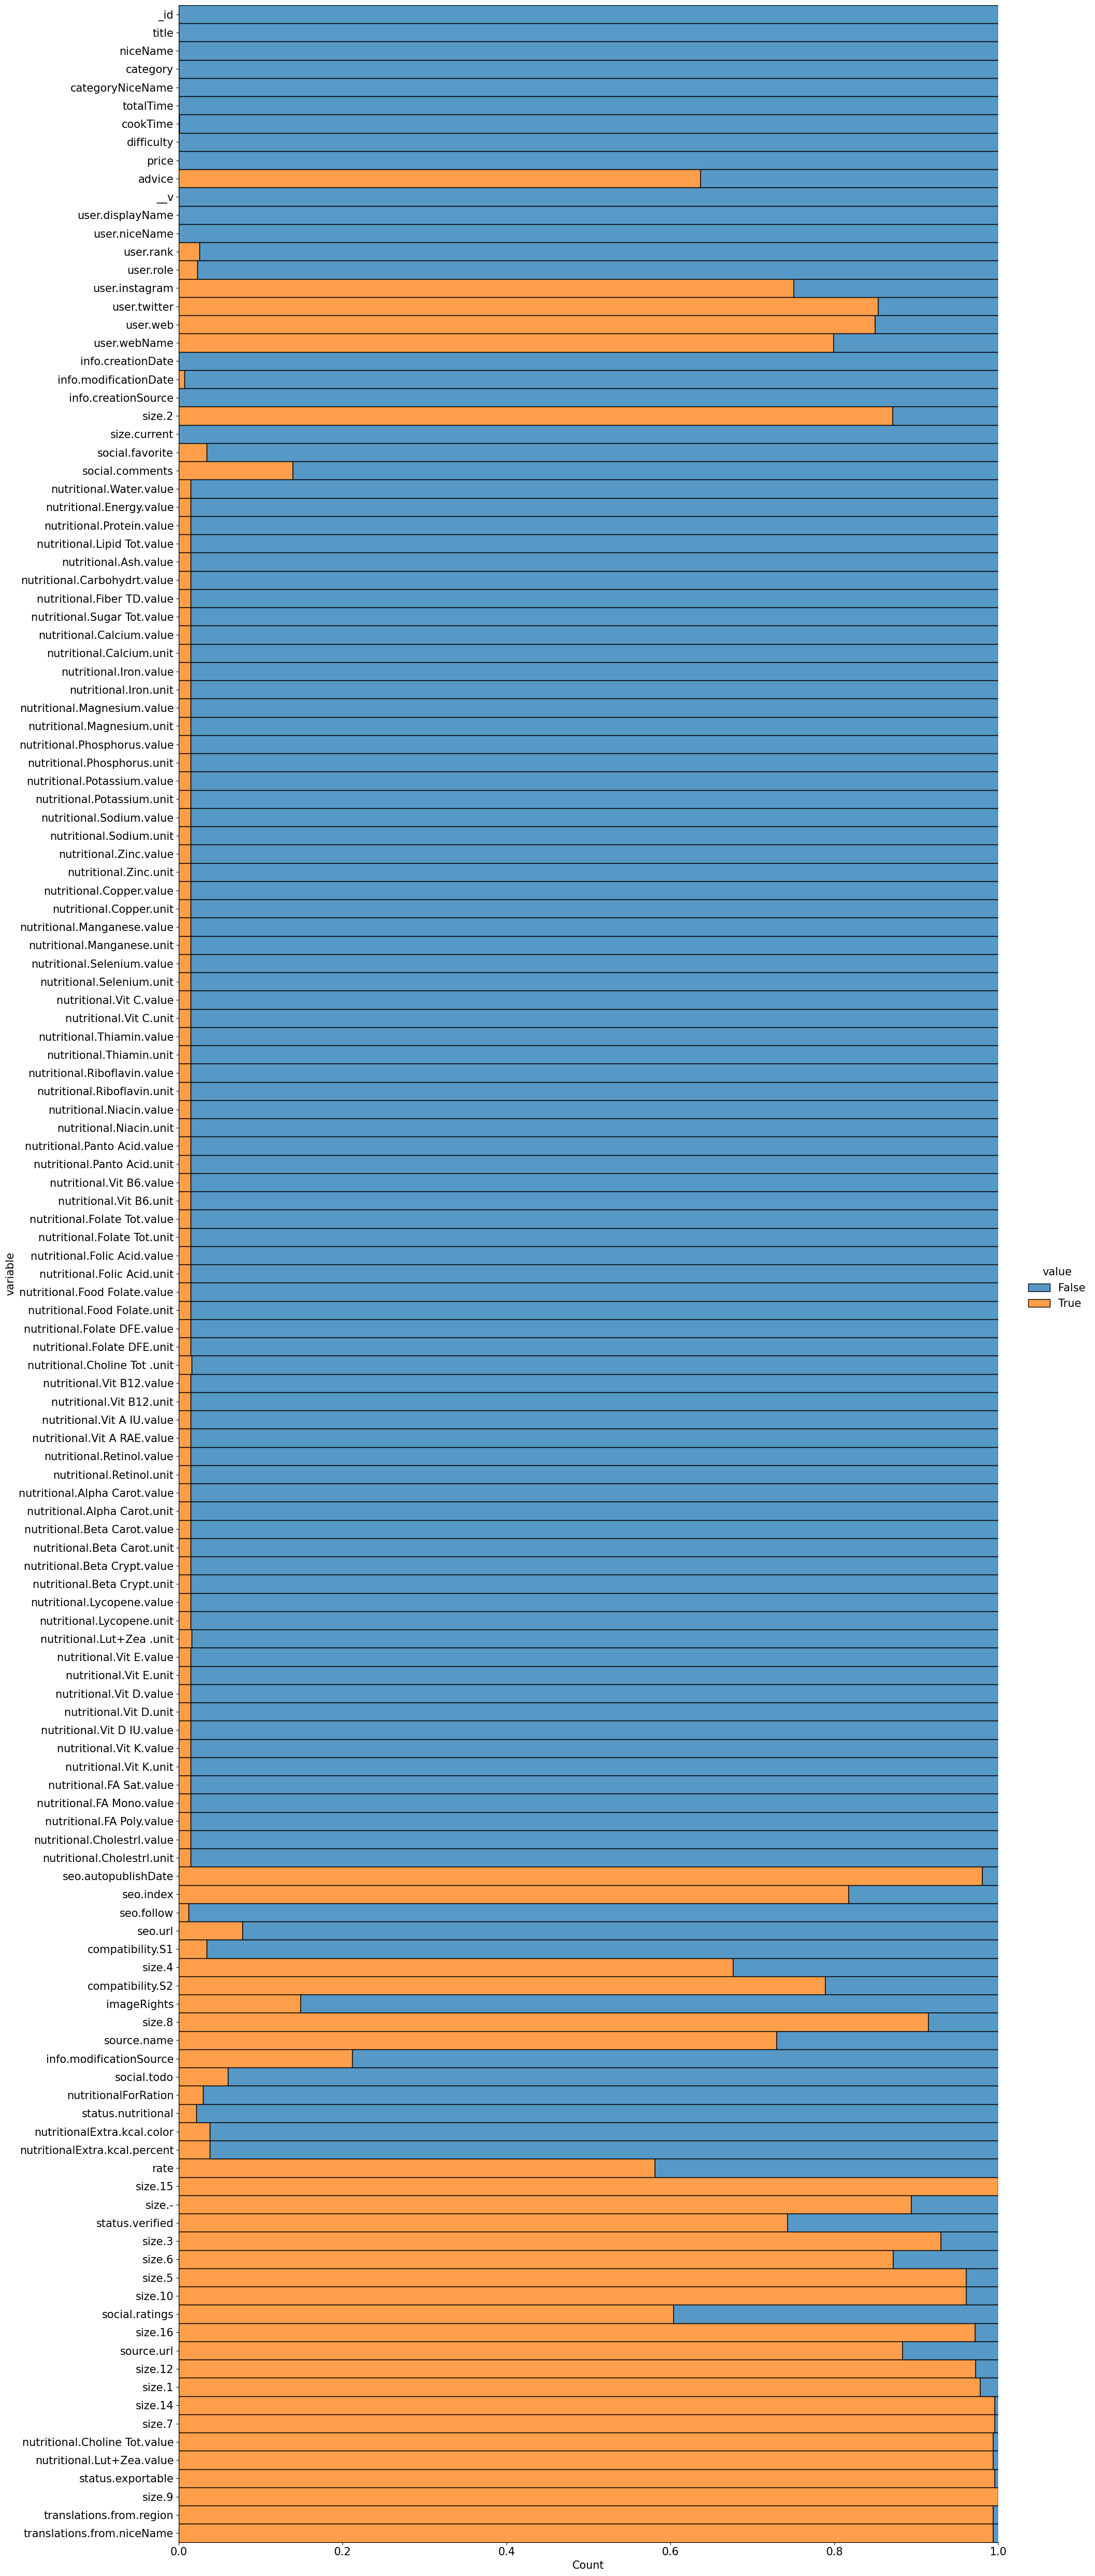

In [8]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_full_complete.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))


In [9]:
df_total = df_full_complete.copy()

In [10]:
df_total

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,__v,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.2,size.current,social.favorite,social.comments,nutritional.Water.value,nutritional.Energy.value,nutritional.Protein.value,nutritional.Lipid Tot.value,nutritional.Ash.value,nutritional.Carbohydrt.value,nutritional.Fiber TD.value,nutritional.Sugar Tot.value,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A RAE.value,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Mono.value,nutritional.FA Poly.value,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.autopublishDate,seo.index,seo.follow,seo.url,compatibility.S1,size.4,compatibility.S2,imageRights,size.8,source.name,info.modificationSource,social.todo,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent,rate,size.15,size.-,status.verified,size.3,size.6,size.5,size.10,social.ratings,size.16,source.url,size.12,size.1,size.14,size.7,nutritional.Choline Tot.value,nutritional.Lut+Zea.value,status.exportable,size.9,translations.from.region,translations.from.niceName
0,67af77c395f47fff8287e2fe,tortitas de plátano,tortitas-de-platano-2,Dulces y repostería,dulces-y-reposteria,155,35.0,1,1,la levadura es 1/2 cucharadita no me deja pone...,0,judithytoni,judithytoni,user,user,NaN,NaN,NaN,NaN,2025-02-14T17:05:07.012Z,2025-02-14T17:05:07.012Z,83.50.243.113 - judithytoni - Mycook App Andro...,tortitas-de-platano-2,2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.0000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.000000,g,0.0,g,0.000000,g,0.000000,g,g,0.00000,g,0.0000,0.000000,0.0000,g,0.000000,g,0.000000,g,0.000,g,0.000000,g,g,0.000000,g,0.00000,g,0.000,0.000000,g,0.000000,0.000000,0.000000,0.000,g,2025-02-14T17:05:07.026Z,False,True,"<a href=""https://mycook.es/receta/tortitas-de-...",tortitas-de-platano-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67af6f4d95f47fff827fb943,"Salmorejo Cordobés, la auténtica receta",salmorejo-cordobes--la-autentica-receta,"Cremas, caldos y sopas",cremas-c

In [11]:
def borranulos(df, umbral=0.05):
    """
    Elimina filas con valores nulos en cada columna del DataFrame si el porcentaje de nulos es menor que un umbral.

    Parámetros:
        df (pd.DataFrame): El DataFrame original.
        umbral (float): Umbral de porcentaje de nulos permitido (por defecto 0.05, es decir, 5%).

    Retorna:
        pd.DataFrame: El DataFrame con las filas eliminadas.
    """
    for columna in df.columns:
        if (nulos := df[columna].isnull().mean()) < umbral:
            df.dropna(subset=[columna], inplace=True)
        else:
            print(f"Advertencia: El porcentaje de nulos en '{columna}' es {nulos:.2%}, "
                  f"que es mayor o igual al umbral de {umbral:.0%}. No se eliminaron filas.")
    return df

In [12]:
borranulos(df_total)

Advertencia: El porcentaje de nulos en 'advice' es 63.63%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.instagram' es 74.39%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.twitter' es 84.93%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.web' es 84.58%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'user.webName' es 79.32%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'size.2' es 87.06%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'social.comments' es 13.64%, que es mayor o igual al umbral de 5%. No se eliminaron filas.
Advertencia: El porcentaje de nulos en 'seo.autopublishDate' es 98.59%, que es mayor o igual al umbral de 5%. No se elimin

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,__v,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.2,size.current,social.favorite,social.comments,nutritional.Water.value,nutritional.Energy.value,nutritional.Protein.value,nutritional.Lipid Tot.value,nutritional.Ash.value,nutritional.Carbohydrt.value,nutritional.Fiber TD.value,nutritional.Sugar Tot.value,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A RAE.value,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Mono.value,nutritional.FA Poly.value,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.autopublishDate,seo.index,seo.follow,seo.url,compatibility.S1,size.4,compatibility.S2,imageRights,size.8,source.name,info.modificationSource,social.todo,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent,rate,size.15,size.-,status.verified,size.3,size.6,size.5,size.10,social.ratings,size.16,source.url,size.12,size.1,size.14,size.7,nutritional.Choline Tot.value,nutritional.Lut+Zea.value,status.exportable,size.9,translations.from.region,translations.from.niceName
5,67acdd61bf9fa02a2102d867,Tronco de pimientos con queso y nueces,tronco-de-pimientos-con-queso-y-nueces,Aperitivos y tapas,aperitivos-tapas,1635,235.0,1,1,"puedes sustituir el queso de rulo , por queso ...",0,lourdes9444,lourdes9444,user_recipes_50,user,NaN,NaN,NaN,NaN,2025-02-12T17:41:50.864Z,2025-02-13T16:22:16.689Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,4,1.0,0.0,105.107750,596.258750,28.508225,42.408350,4.292700,28.655325,3.913750,3.113200,728.584000,mg,2.239618,mg,92.629750,mg,686.393750,mg,602.878000,mg,198.510500,mg,4.315900,mg,0.579086,mg,1.348985,mg,38.171350,ug,52.027500,mg,0.190425,mg,0.425445,mg,1.152815,mg,1.088550,mg,0.383150,mg,100.350000,ug,0.0,ug,100.350000,ug,100.350000,ug,mg,2.141400,ug,2586.370000,310.835000,217.68500,ug,12.305000,ug,1016.405000,ug,188.630000,ug,0.625000,ug,ug,1.583800,mg,0.59400,ug,23.9800,30.824500,ug,14.352029,9.035067,15.664284,177.475000,mg,2025-02-12T17:41:53.128Z,False,True,NaN,tronco-de-pimientos-con-queso-y-nueces,tronco-de-pimientos-con-queso-y-nueces,tronco-de-pimientos-con-queso-y-nueces,True,NaN,NaN,80.26.90.116 - ondho - Mozilla/5.0 (Windows NT...,0.0,False,Auto (Good),Yellow,29.812938,NaN,N

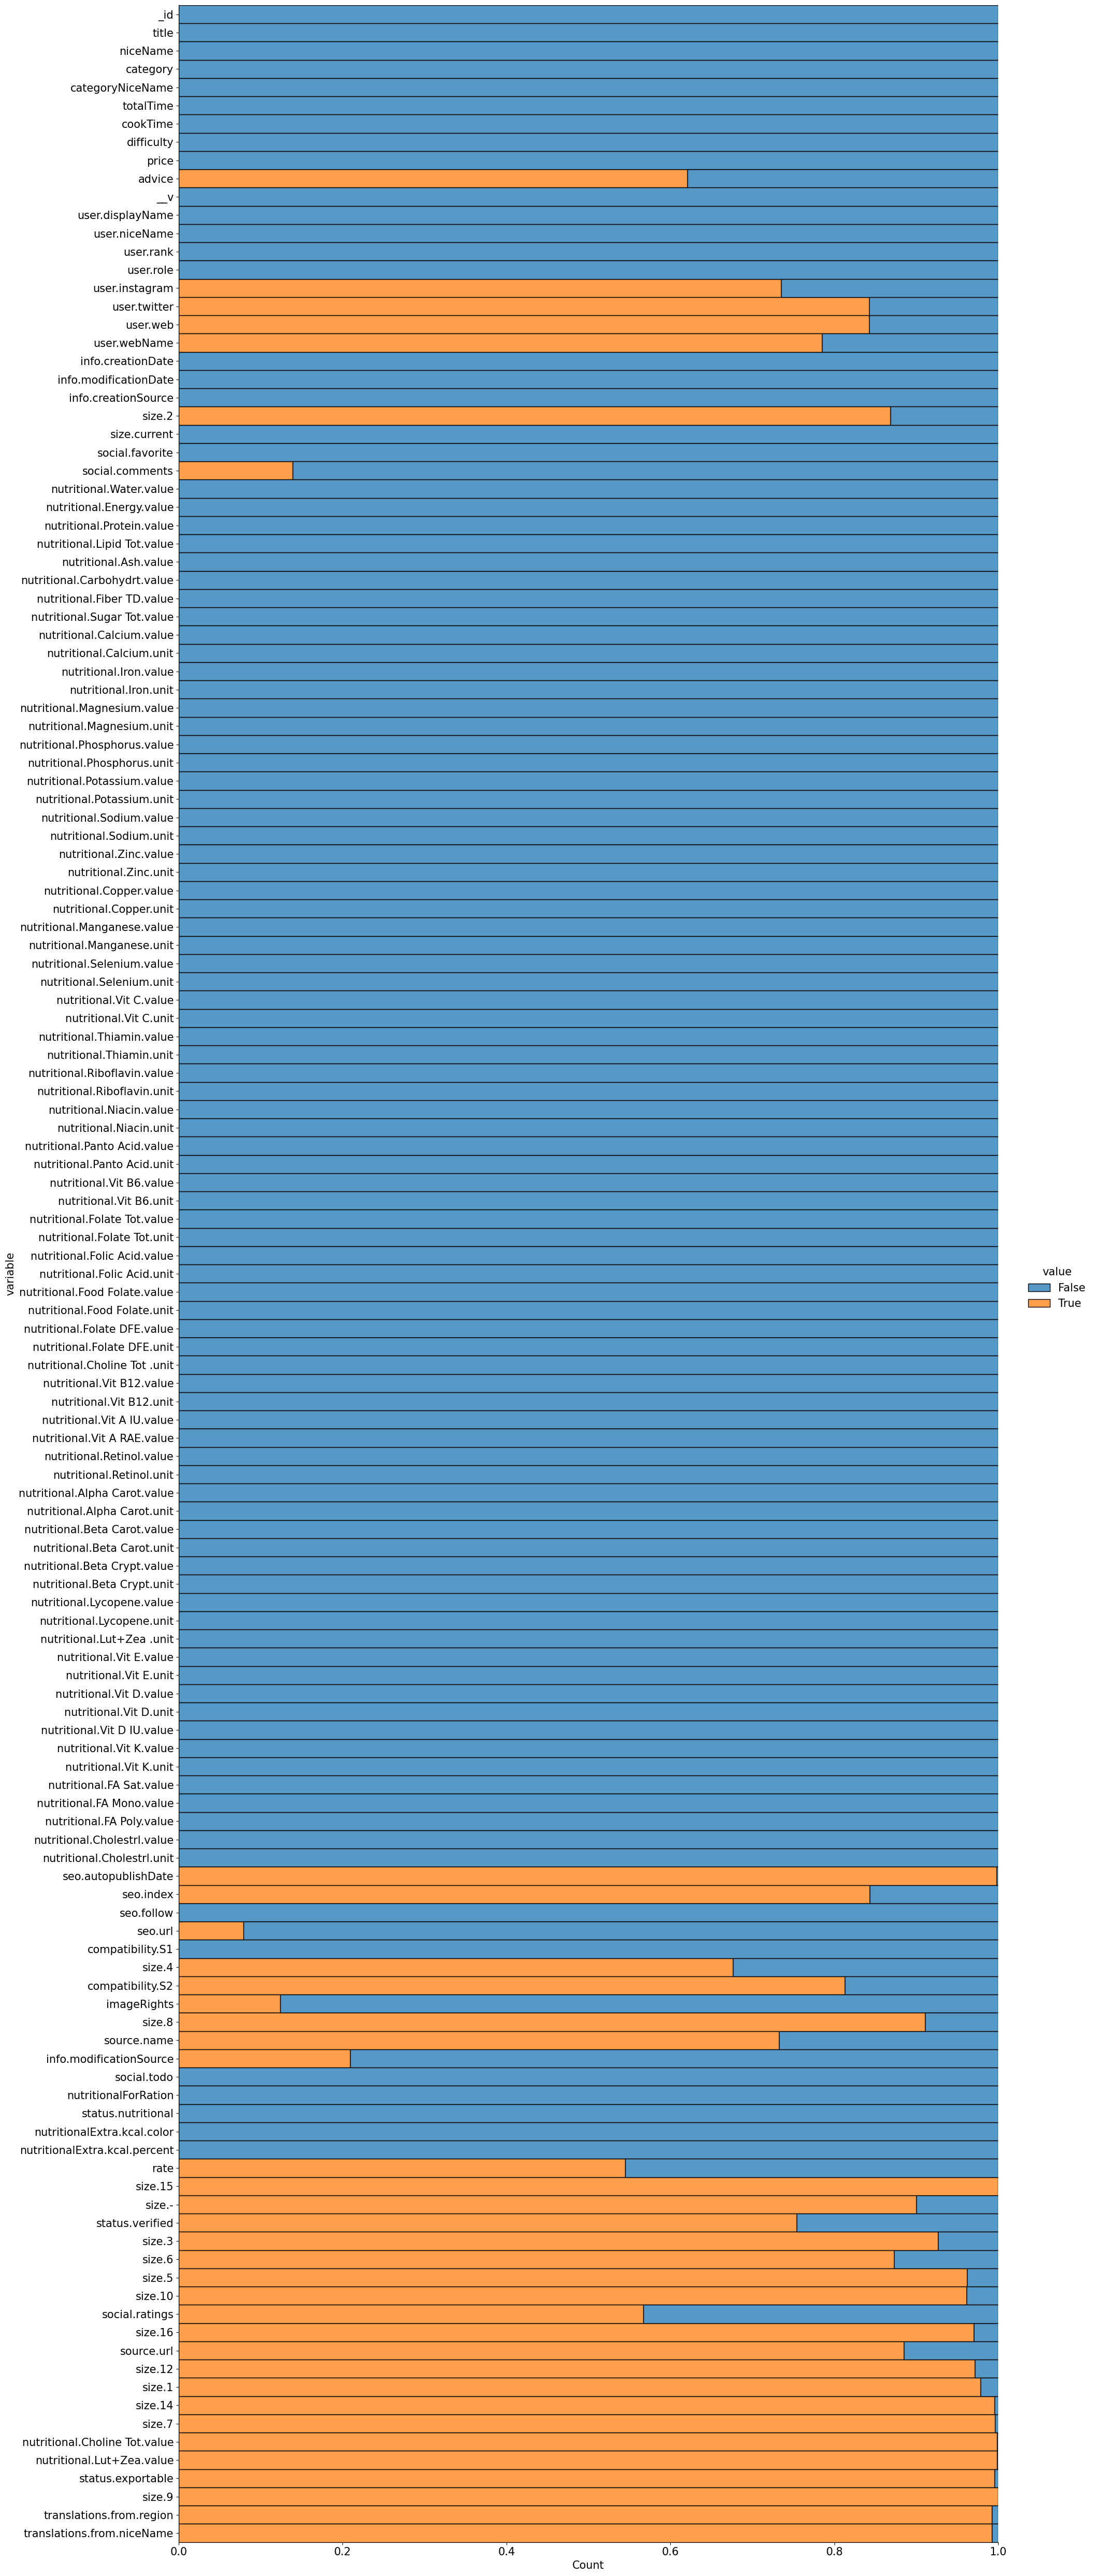

In [13]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

In [14]:
import pandas as pd

def analizar_nulos(df):
    """
    Recorre todas las columnas de un DataFrame y muestra información detallada de las columnas que tienen valores nulos.

    Parámetros:
        df (pd.DataFrame): El DataFrame a analizar.
    """
    for columna in df.columns:
        if df[columna].isnull().sum() > 0:  # Verificar si la columna tiene nulos
            print(f"\n=== Análisis de la columna '{columna}' ===")
            
            # 1. Valores únicos
            print("\nValores únicos:")
            print(df[columna].unique())
            
            # 2. Cantidad de nulos
            print(f"\nCantidad de nulos: {df[columna].isnull().sum()}")
            
            # 3. Porcentaje de nulos
            porcentaje_nulos = df[columna].isnull().mean() * 100
            print(f"Porcentaje de nulos: {porcentaje_nulos:.2f}%")
            
            # 4. Value counts (frecuencia de valores)
            print("\nFrecuencia de valores (value_counts):")
            print(df[columna].value_counts(dropna=False))  # Incluye nulos
            
            # 5. Value counts normalizado (proporción de valores)
            print("\nProporción de valores (value_counts normalize=True):")
            print(df[columna].value_counts(normalize=True, dropna=False))  # Incluye nulos
            
            # 6. Tipo de dato de la columna
            print(f"\nTipo de dato: {df[columna].dtype}")
            
            # 7. Estadísticas descriptivas (si la columna es numérica)
            if pd.api.types.is_numeric_dtype(df[columna]):
                print("\nEstadísticas descriptivas:")
                print(df[columna].describe())
            
            # 8. Cantidad de valores no nulos
            print(f"\nCantidad de valores no nulos: {df[columna].notnull().sum()}")
            
            print("\n" + "=" * 50)  # Separador visual


In [15]:
analizar_nulos(df_total)


=== Análisis de la columna 'advice' ===

Valores únicos:
['puedes sustituir el queso de rulo , por queso philadelphia' nan
 '1.\tUtiliza mandarinas frescas. El sabor cítrico y jugoso de las mandarinas frescas hará que el bizcocho tenga un toque único. Aprovecha tanto el zumo como la ralladura de la piel para intensificar el sabor.\n\t2.\tAsegúrate de que los huevos estén a temperatura ambiente. Esto ayudará a que se mezclen mejor y el bizcocho tenga una textura más suave y esponjosa.\n\t3.\tCuando incorpores la harina, hazlo con movimientos suaves para evitar que el bizcocho quede denso. Mezclar demasiado puede hacer que pierda ligereza.\n\t4.\tCada horno es diferente, así que asegúrate de comprobar la cocción del bizcocho pinchando con un palillo. Si sale limpio, ¡está listo!\n\t5.\tDeja reposar el bizcocho unos minutos en el molde antes de desmoldarlo. Esto ayudará a que no se rompa y mantenga su forma.\n\t6.\tSi quieres darle un toque especial, espolvorea un poco de azúcar glas por

### inputamos algunos nulos

In [16]:
df_total["advice"].fillna("No disponible", inplace=True)
df_total["user.webName"].fillna("No disponible", inplace=True)
df_total["user.instagram"].fillna("No disponible", inplace=True)
df_total["user.twitter"].fillna("No disponible", inplace=True)
df_total["user.web"].fillna("No disponible", inplace=True)
df_total["imageRights"].fillna("No disponible", inplace=True)
df_total["rate"].fillna("No disponible", inplace=True)

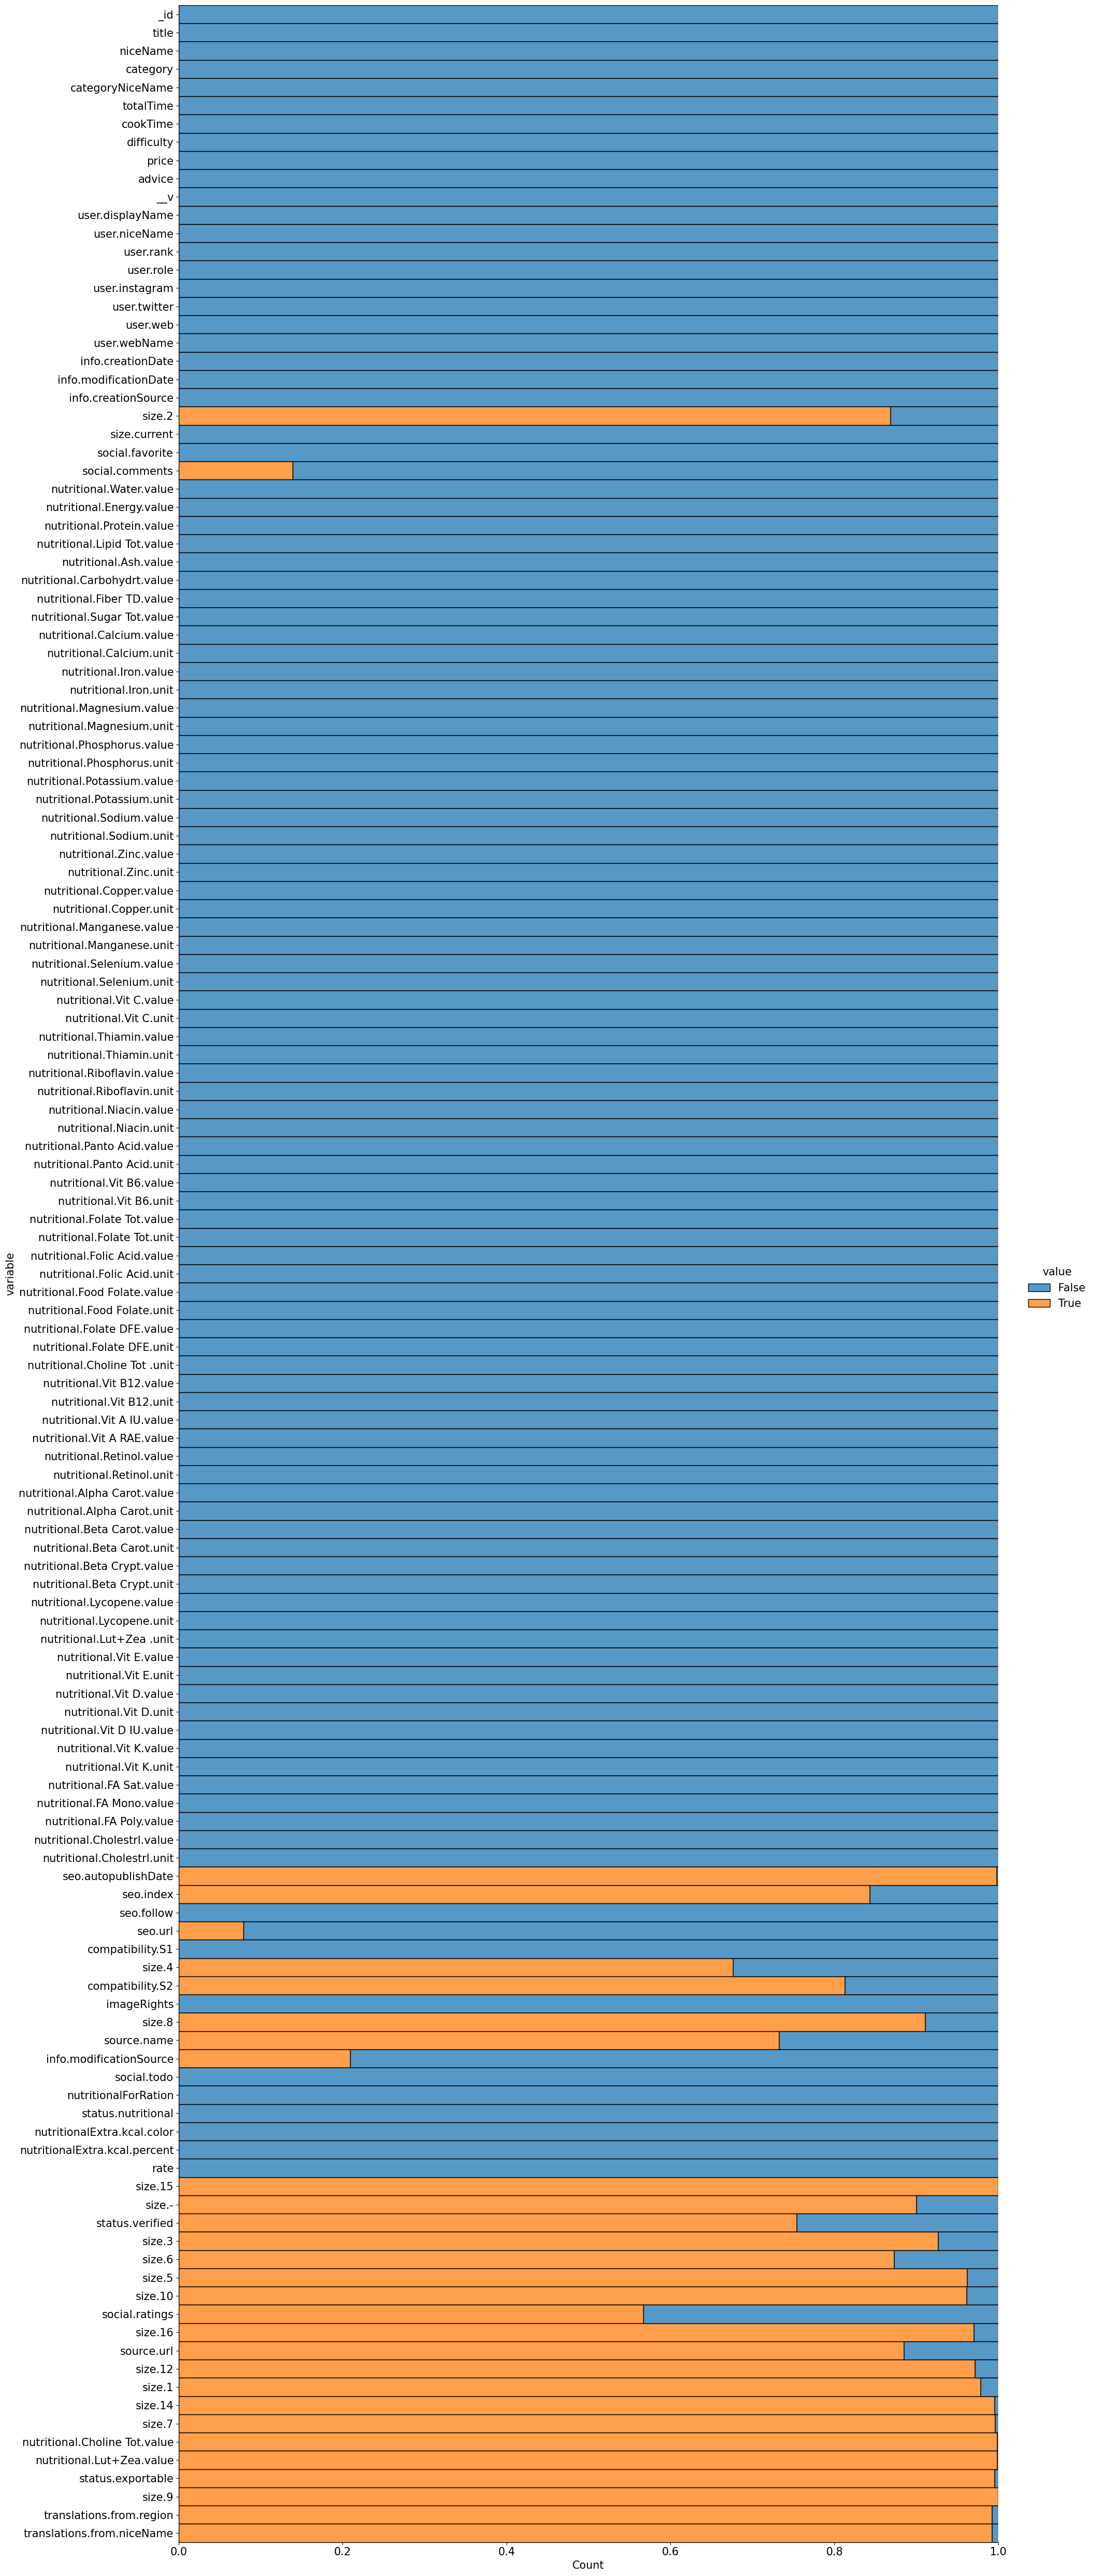

In [17]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

### despues de explorar las columnas con nulos de forma manual decidimos borrarlas

In [18]:
df_total.dropna(axis=1, how='any',inplace=True)

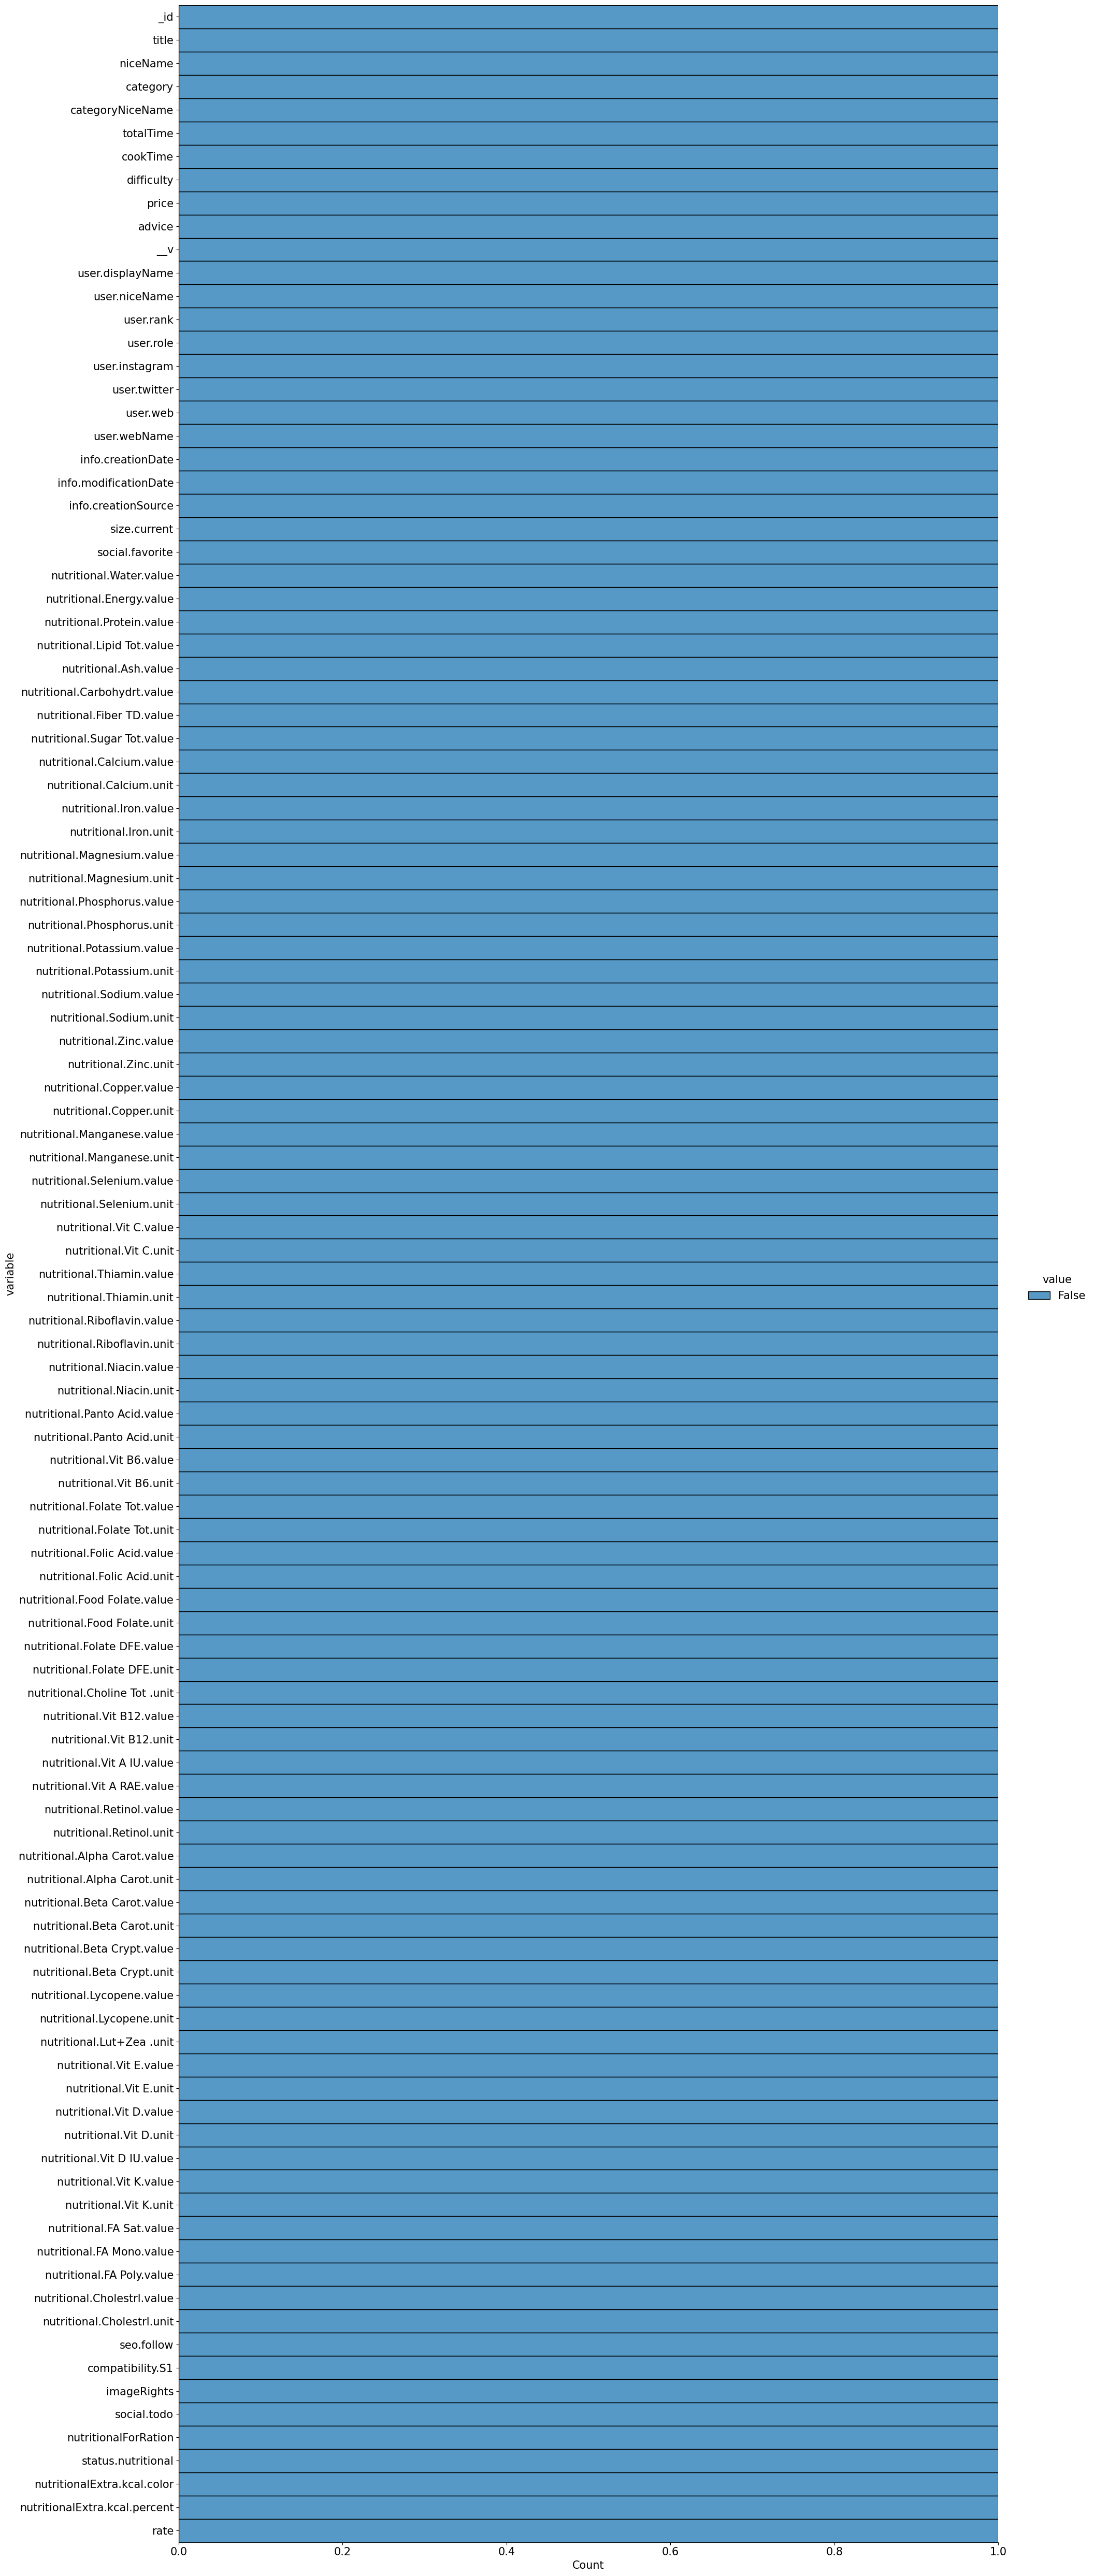

In [19]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

Ya tenemos el df_total sin nulos y sin duplicados. ya podemos operar con el y hacer algunas graficas

In [20]:
df_total.head()

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,__v,user.displayName,user.niceName,user.rank,user.role,user.instagram,user.twitter,user.web,user.webName,info.creationDate,info.modificationDate,info.creationSource,size.current,social.favorite,nutritional.Water.value,nutritional.Energy.value,nutritional.Protein.value,nutritional.Lipid Tot.value,nutritional.Ash.value,nutritional.Carbohydrt.value,nutritional.Fiber TD.value,nutritional.Sugar Tot.value,nutritional.Calcium.value,nutritional.Calcium.unit,nutritional.Iron.value,nutritional.Iron.unit,nutritional.Magnesium.value,nutritional.Magnesium.unit,nutritional.Phosphorus.value,nutritional.Phosphorus.unit,nutritional.Potassium.value,nutritional.Potassium.unit,nutritional.Sodium.value,nutritional.Sodium.unit,nutritional.Zinc.value,nutritional.Zinc.unit,nutritional.Copper.value,nutritional.Copper.unit,nutritional.Manganese.value,nutritional.Manganese.unit,nutritional.Selenium.value,nutritional.Selenium.unit,nutritional.Vit C.value,nutritional.Vit C.unit,nutritional.Thiamin.value,nutritional.Thiamin.unit,nutritional.Riboflavin.value,nutritional.Riboflavin.unit,nutritional.Niacin.value,nutritional.Niacin.unit,nutritional.Panto Acid.value,nutritional.Panto Acid.unit,nutritional.Vit B6.value,nutritional.Vit B6.unit,nutritional.Folate Tot.value,nutritional.Folate Tot.unit,nutritional.Folic Acid.value,nutritional.Folic Acid.unit,nutritional.Food Folate.value,nutritional.Food Folate.unit,nutritional.Folate DFE.value,nutritional.Folate DFE.unit,nutritional.Choline Tot .unit,nutritional.Vit B12.value,nutritional.Vit B12.unit,nutritional.Vit A IU.value,nutritional.Vit A RAE.value,nutritional.Retinol.value,nutritional.Retinol.unit,nutritional.Alpha Carot.value,nutritional.Alpha Carot.unit,nutritional.Beta Carot.value,nutritional.Beta Carot.unit,nutritional.Beta Crypt.value,nutritional.Beta Crypt.unit,nutritional.Lycopene.value,nutritional.Lycopene.unit,nutritional.Lut+Zea .unit,nutritional.Vit E.value,nutritional.Vit E.unit,nutritional.Vit D.value,nutritional.Vit D.unit,nutritional.Vit D IU.value,nutritional.Vit K.value,nutritional.Vit K.unit,nutritional.FA Sat.value,nutritional.FA Mono.value,nutritional.FA Poly.value,nutritional.Cholestrl.value,nutritional.Cholestrl.unit,seo.follow,compatibility.S1,imageRights,social.todo,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent,rate
5,67acdd61bf9fa02a2102d867,Tronco de pimientos con queso y nueces,tronco-de-pimientos-con-queso-y-nueces,Aperitivos y tapas,aperitivos-tapas,1635,235.0,1,1,"puedes sustituir el queso de rulo , por queso ...",0,lourdes9444,lourdes9444,user_recipes_50,user,No disponible,No disponible,No disponible,No disponible,2025-02-12T17:41:50.864Z,2025-02-13T16:22:16.689Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4,1.0,105.107750,596.258750,28.508225,42.408350,4.292700,28.655325,3.913750,3.113200,728.584000,mg,2.239618,mg,92.629750,mg,686.39375,mg,602.878000,mg,198.510500,mg,4.315900,mg,0.579086,mg,1.348985,mg,38.171350,ug,52.027500,mg,0.190425,mg,0.425445,mg,1.152815,mg,1.088550,mg,0.383150,mg,100.350000,ug,0.0,ug,100.350000,ug,100.350000,ug,mg,2.141400,ug,2586.370000,310.835000,217.68500,ug,12.305000,ug,1016.405000,ug,188.630000,ug,0.625000,ug,ug,1.583800,mg,0.5940,ug,23.9800,30.824500,ug,14.352029,9.035067,15.664284,177.475000,mg,True,tronco-de-pimientos-con-queso-y-nueces,True,0.0,False,Auto (Good),Yellow,29.812938,No disponible
8,67aa4802c995db82d9be53da,Relleno para tarta de atún,relleno-para-tarta-de-atun,Pescados y mariscos,pescados-y-mariscos,630,630.0,1,2,No disponible,0,Vane,vanemiano,user_recipes_5,user,No disponible,No disponible,No disponible,No disponible,2025-02-10T18:40:01.317Z,2025-02-11T08:37:46.727Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4,1.0,239.709410,453.121000,32.570790,29.910160,3.289440,13.544750,2.415300,5.792190,238.094500,mg,1.915290,mg,54.202000,mg,422.85300,mg,525.544500,mg,602.483000,mg,1.830390,m

In [ ]:
file_name = "df_Final.csv"
df_total.to_csv(file_name, index=False)